In [1]:
# If gspx is not installed, we add it to the path
import os, sys
gdir = os.path.dirname(os.getcwd())  # parent folder
sys.path.insert(0, gdir)

from gspx.signals import QuaternionSignal
from gspx.graphs import ImageGraph, Graph
from gspx.utils.graph import make_grid
import matplotlib.pyplot as plt
import numpy as np

# Creating and visualizing a quaternion square matrix as a color image on a grid graph

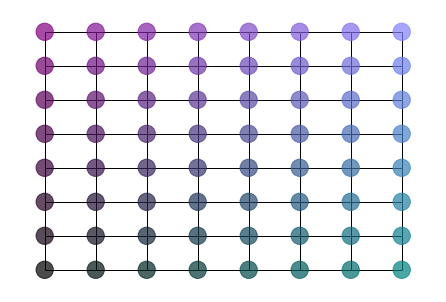

In [2]:
n = 8
layer_i = np.ones((n,n)) @ np.diag(np.arange(n))
layer_j = np.diag(np.arange(n)) @ np.ones((n,n))
layer_k = layer_i + layer_j

layer_1 = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        layer_1[i, j] = ((i- n/2)**2) + ((j-n/2)**2)
layer_1 = np.round(layer_1).astype(int)

real_mat = np.dstack((layer_1, layer_i, layer_j, layer_k))
s = real_mat.reshape(-1, 4)

signal = QuaternionSignal.from_rectangular(s)

A, coords = make_grid(rows=n, columns=n)
graph = Graph(A)

graph.plot(signal, coords=coords)

In [4]:
graph.compute_eigenbasis(k=6, M=None, sigma=None, return_eigenvectors=True)

In [5]:
v = graph.v

In [12]:
graph.v.imag.sum()

0.0